<a href="https://colab.research.google.com/github/sau-rabh999/Deep-Learning/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [ ]:
#uploading the MNIST dataset
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
x_train[0].shape

(28, 28)

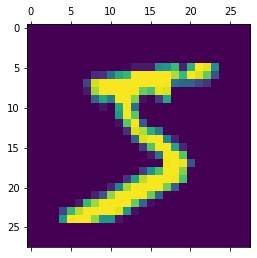

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:

x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [ ]:
x_test_flatten.shape

(10000, 784)

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(10 , input_shape=(784,) , activation= 'sigmoid')
                          
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten , y_train , epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.5538 - accuracy: 0.8421
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.0990 - accuracy: 0.8788
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6422 - accuracy: 0.8848
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.5100 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3593 - accuracy: 0.8869


In [ ]:
#evaluating the accuracy on test dataset

model.evaluate(x_test_flatten , y_test)

313/313 [==============================] - 1s 1ms/step - loss: 5.9669 - accuracy: 0.8912


[5.966948986053467, 0.8912000060081482]

In [ ]:
model.predict(x_test_flatten)

array([[0.0000000e+00, 0.0000000e+00, 3.9598103e-11, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 3.2612600e-15,
        9.9999785e-01, 1.6915798e-04],
       ...,
       [0.0000000e+00, 0.0000000e+00, 3.7939765e-25, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 2.4576187e-03, 0.0000000e+00, ..., 1.6725217e-10,
        1.0000000e+00, 1.4432893e-29],
       [1.0204965e-17, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        4.2469798e-13, 0.0000000e+00]], dtype=float32)

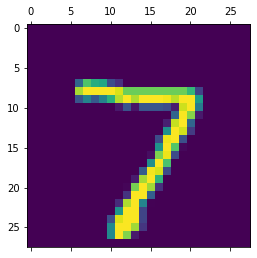

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predict = model.predict(x_test_flatten)

In [ ]:
y_predict[0]

array([0.0000000e+00, 0.0000000e+00, 3.9598103e-11, 1.0000000e+00,
       2.8179707e-14, 3.8626492e-03, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [ ]:
np.argmax(y_predict[0])

3

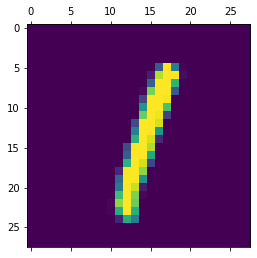

In [ ]:
plt.matshow(x_test[5])

In [ ]:
np.argmax(y_predict[5])

1

In [ ]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[3, 0, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    2,    2,    2,    1,    0,    0,    0,    0],
       [   1, 1131,    1,    0,    0,    1,    0,    0,    0,    1],
       [  64,  388,  570,    3,    6,    0,    1,    0,    0,    0],
       [  87,  532,  241,  149,    1,    0,    0,    0,    0,    0],
       [  20,  138,  130,   75,  619,    0,    0,    0,    0,    0],
       [ 109,  204,  169,  205,  123,   81,    0,    0,    1,    0],
       [ 137,  208,  553,    9,   31,   11,    9,    0,    0,    0],
       [  42,  128,  238,  540,   65,    8,    0,    6,    1,    0],
       [  39,  519,  264,   63,   51,   29,    0,    5,    4,    0],
       [  18,  138,   85,  333,  419,    1,    0,    4,    2,    9]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

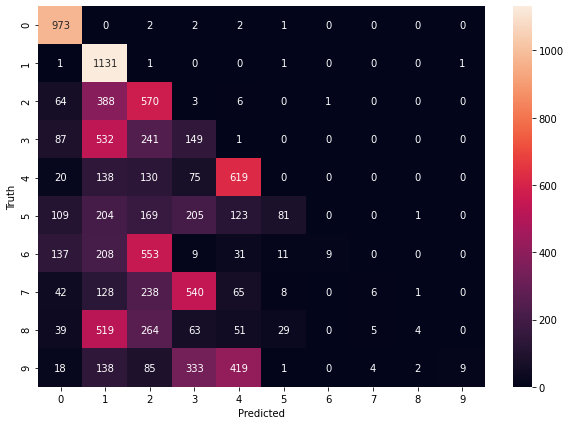

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# adding hidden layer

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100 , input_shape=(784,) , activation= 'relu'),
                          keras.layers.Dense(10 , activation= 'sigmoid')
                          
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4391 - accuracy: 0.8437
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3850 - accuracy: 0.9057
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.9268
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2534 - accuracy: 0.9348
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2303 - accuracy: 0.9418


In [ ]:
#evaluating the accuracy on test dataset

model.evaluate(x_test_flatten , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2796 - accuracy: 0.9372


[0.2796146869659424, 0.9372000098228455]

Text(69.0, 0.5, 'Truth')

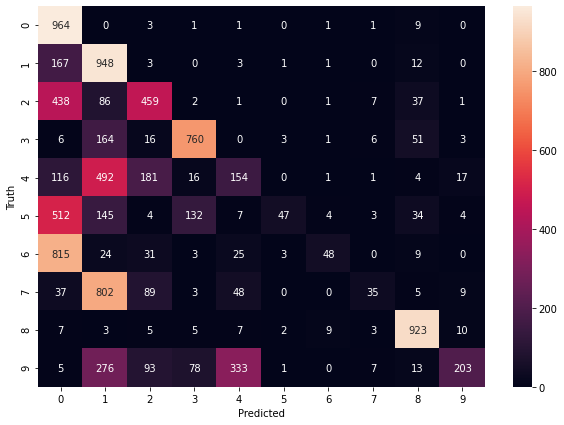

In [ ]:
y_predict = model.predict(x_test_flatten)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predict_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**flattening using keras**

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100, activation= 'relu'),
                          keras.layers.Dense(10 , activation= 'sigmoid')
                          
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2738 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0516 - accuracy: 0.9842


# Random basic program

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])

training_outputs = np.array([[0,1,1,0]]).T

np.random.seed(1)

synaptic_weights = 2*np.random.random((3,1)) -1 

print('Random starting synaptic weights: ')
print(synaptic_weights)

for iteration in range(1):

  input_layer = training_inputs
  outputs = sigmoid(np.dot(input_layer,synaptic_weights))

print('Outputs after training: ')
print(outputs)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Outputs after training: 
[[0.2689864 ]
 [0.3262757 ]
 [0.23762817]
 [0.36375058]]


# Loss or cost function

In [ ]:
import numpy as np

y_predicted = np.array([1,1,0,0,1])
y_true = ([0.30,0.70,1,0,0.5])

In [ ]:
def mae(y_true,y_predicted):
  total_error = 0
  for yt, yp in zip(y_true,y_predicted):
    total_error+=abs(yt-yp)
  print("total error: ", total_error) 

  mae = total_error/len(y_true) 
  print("mean absolute error: ", mae)

In [ ]:
mae(y_true,y_predicted)

total error:  2.5
mean absolute error:  0.5


In [ ]:
print('total error = ',np.sum(np.abs(y_predicted - y_true)))
print('mean abs error = ',np.mean(np.abs(y_predicted - y_true)))

total error =  2.5
mean abs error =  0.5


# Based on the document

In [ ]:
import numpy as np

class Perceptron(object):
  def __init__(self, input_size, lr=0.5, epochs=10):
    self.W = np.zeros(input_size+1)
    self.epochs = epochs
    self.lr = lr

  #implement activation fun
  def activation_fn(self, x):
    return 1 if x >= 0 else 0

  def predict(self, x):
    z = self.W.T.dot(x)
    a = self.activation_fn(z)
    return a

  def fit(self, X, d):
    for _ in range(self.epochs):
      for i in range(d.shape[0]):
        x = np.insert(X[i], 0, 1)
        y = self.predict(x)
        e = d[i] - y
        self.W = self.W + self.lr * e * x

In [ ]:
if __name__ == '__main__':
  X = np.array([
                [0, 0], 
                [0, 1], 
                [1, 0], 
                [1, 1]
  ])
  d = np.array([0, 0, 0, 1])
  perceptron = Perceptron(input_size=2)
  perceptron.fit(X, d)
  print(perceptron.W)

[-1.5  1.   0.5]


# Assignment

In [ ]:
import numpy as np

#activation fun
def sigmoid(x):
  return(1/1+np.exp(-x))

#inputs
x1 = 3
x2 = 2

#weights
w1 = 0.11
w2 = 0.21
w3 = 0.12
w4 = 0.08
w5 = 0.14
w6 = 0.15

#biases
b1 = 0.3
b2 = 0.4
net_a1 = 0
net_a2 = 0
out_a1 = 0
out_a2 = 0
net_o = 0
out_o = 0

lr = 0.5
iter = 1000000
threshold = 0.001
convergence_step = 0

for i in range(iter):
  net_a1 = w3*x2 + w4*x1 + b1*1
  net_a2 = w1*x2 + w2*x1 + b1*1
  out_a1 = sigmoid(net_a1)
  out_a2 = sigmoid(net_a2)
  net_o  = w5*out_a2 + w6*out_a1 + b2*1
  out_o  = sigmoid(net_o)

  # condition for convergence
  if abs(out_o - 1) < threshold:
      convergence_step = i
      break

  # First iteration output is closer to 1 So take target = 1
  target = 1

  # error
  E_total = (1/2)*(target - out_o)**2  

  # w5 and w6 error dependency
  dEdout_o = -1*(target - out_o)
  dout_odnet_o = out_o*(1 - out_o)
  dnet_odw5 = out_a2
  dEdw5 = dEdout_o * dout_odnet_o * dnet_odw5
  dnet_odw6 = out_a1
  dEdw6 = dEdout_o * dout_odnet_o * dnet_odw6

  # w1 error dependency
  dnet_odout_a2 = w5
  dout_a2dnet_a2 = out_a2*(1 - out_a2)
  dnet_a2dw1 = x2 
  dEdw1 = dEdout_o * dout_odnet_o * dnet_odout_a2 * dout_a2dnet_a2 *dnet_a2dw1

  # w2 error dependency
  dnet_a2dw2 = x1
  dEdw2 = dEdout_o * dout_odnet_o * dnet_odout_a2 * dout_a2dnet_a2 *dnet_a2dw2 

  # w3 error dependency
  dnet_odout_a1 = w6
  dout_a1dnet_a1 = out_a1*(1 - out_a1)
  dnet_a1dw3 = x1
  dEdw3 = dEdout_o * dout_odnet_o * dnet_odout_a1 * dout_a1dnet_a1 *dnet_a1dw3

  # w4 error dependency
  dnet_a1dw4 = x1
  dEdw4 = dEdout_o * dout_odnet_o * dnet_odout_a1 * dout_a1dnet_a1 *dnet_a1dw4

  # Updating the weights
  w1 = w1 - lr * dEdw1
  w2 = w2 - lr * dEdw2
  w3 = w3 - lr * dEdw3
  w4 = w4 - lr * dEdw4
  w5 = w5 - lr * dEdw5
  w6 = w6 - lr * dEdw6

print('Convergence occurs at',convergence_step,'th step with \u03B7 = 0.5')
print('Convergence criterion : true value - output value < 0.001')

print('out_o = ',out_o)


Convergence occurs at 392 th step with η = 0.5
Convergence criterion : true value - output value < 0.001
out_o =  1.0009988753782748


In [ ]:
import numpy as np
import math

def sig(x):
 return 1/(1 + np.exp(-x))

weights = [0.11 ,0.21,0.12 ,0.08,0.14,0.15 ]
bias = [0.3,0.4]
inputs = [2,3]
threshold = 0.001
iter = 10000000
neta=0.6

for i in range(iter):
  net_a2 = weights[1]*inputs[0] + weights[0]*inputs[1] + bias[0]
  net_a1 = weights[3]*inputs[0] + weights[2]*inputs[1] + bias[0]
  out_a2 = sig(net_a2)
  out_a1 = sig(net_a1)
  net_out = weights[4]*out_a2 + weights[5]*out_a1 +bias[1]
  output = sig(net_out)

  if abs(output-1) < threshold:
    convergence = i
    break
   
  ### Error Calculation

  error = 0.5 * pow((1-output),2)

  ### Change in Weights

  delw1 = (output-1) * output * (1-output) * weights[4] * out_a2*(1-out_a2) * inputs[0]
  delw2 = (output-1) * output * (1-output) * weights[4] * out_a2*(1-out_a2) * inputs[1]
  delw3 = (output-1) * output * (1-output) * weights[5] * out_a1*(1-out_a1) * inputs[0]
  delw4 = (output-1) * output * (1-output) * weights[5] * out_a1*(1-out_a1) * inputs[1]
  delw5 = (output-1) * output * (1-output) * out_a2
  delw6 = (output-1) * output * (1-output) * out_a1

  ### Updation in weights
  weights[0] = weights[0] - (neta * delw1)
  weights[1] = weights[1] - (neta * delw2)
  weights[2] = weights[2] - (neta * delw3)
  weights[3] = weights[3] - (neta * delw4)
  weights[4] = weights[4] - (neta * delw5)
  weights[5] = weights[5] - (neta * delw6)

print("convergence occurs at the step when \u03B7 = 0.6:",convergence)

print(weights)

convergence occurs at the step when η = 0.6: 418895
[0.6324674753770839, 0.9937012130655791, 0.6754569705576186, 0.9131854558363921, 3.319850041945741, 3.2875775289186477]
